# ML 6364 Projet 1 - Submission

**Individual Work**
- Ilyas Karimov (ilyaskarimov@gwu.edu)

## Importing Libraries

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import export_text
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np


pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option("max_columns", None)

# Part 1

## Reading the data

In [2]:
# Read .csv files. 
path = "./online_shoppers_intention_cs4364.csv"
df_original = pd.read_csv(path)

In [3]:
df_original.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Some data observations

The Features **"Weekend"** and **"Revenue"** should be converted to 0 and 1 since their values are categorically binary. Two other features called **"VisitorType"** and **"Month"** should be dropped since they are categorical. 

In [4]:
# Copying dataframe for use. 
df = df_original.copy()

## Holdout data splitting as specified

In [5]:
training_data = df.loc[1:9999, :]
holdout_data = df.loc[10000:12331, :]

len(holdout_data)

2330

## Explanation of generalization from such a holdout split

Splitting data this way might have different disadvantages
1. Data must be split **randomly** since the chosen holdout split might have one kind of data. This kind of split might increase the bias of the data which will affect model's accuracy. 
2. Now both training and holdout data have categorial values which must be handled separately. 
3. We must split data to validation as well, which is not done here. 


In [6]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Part 2

In [7]:
# Value_counts() for training data
for col in training_data.columns: 
    training_data_value_counts = training_data[col].value_counts(dropna=False)
    print("Column name", col," values ", training_data_value_counts, sep = '\n')

Column name
Administrative
 values 
0     4642
1     1100
2      931
3      753
4      642
5      464
6      353
7      264
8      233
9      170
10     129
11      82
12      61
13      48
14      34
15      32
16      18
17      14
18      10
19       5
24       4
22       3
23       3
20       2
21       1
27       1
Name: Administrative, dtype: int64
Column name
Administrative_Duration
 values 
0.000000      4754
4.000000        49
5.000000        44
6.000000        34
7.000000        34
              ... 
141.140000       1
73.900000        1
464.000000       1
485.333333       1
398.066667       1
Name: Administrative_Duration, Length: 2819, dtype: int64
Column name
Informational
 values 
0     7916
1      861
2      577
3      282
4      168
5       73
6       56
7       28
9       13
8       11
10       4
12       4
14       2
24       1
16       1
11       1
13       1
Name: Informational, dtype: int64
Column name
Informational_Duration
 values 
0.000000      8085
9.000000    

In [8]:
# Value_counts() for holdout_data
for col in holdout_data.columns: 
    holdout_data_value_counts = holdout_data[col].value_counts(dropna=False)
    print("Column name", col," values ", holdout_data_value_counts, sep = '\n')

Column name
Administrative
 values 
0     1125
1      254
2      183
3      162
4      123
5      111
6       79
7       74
9       55
8       54
12      25
10      24
11      23
14      10
13       8
15       6
16       6
17       2
18       2
19       1
26       1
22       1
21       1
Name: Administrative, dtype: int64
Column name
Administrative_Duration
 values 
0.000000      1148
7.000000        11
14.000000       10
11.000000       10
19.000000        9
              ... 
100.500000       1
483.333333       1
25.625000        1
192.847619       1
190.416667       1
Name: Administrative_Duration, Length: 835, dtype: int64
Column name
Informational
 values 
0     1782
1      180
2      151
3       98
4       54
5       26
6       22
7        8
8        3
10       3
9        2
12       1
Name: Informational, dtype: int64
Column name
Informational_Duration
 values 
0.000000      1839
10.000000        8
5.000000         8
9.000000         8
8.000000         8
              ... 
494.00

In [9]:
# Checking percentage of missing data in training dataset. 
percent_missing_training_data = training_data.isnull().sum() * 100 / len(training_data)
print("Missing percentage for the training data: ", percent_missing_training_data)

# Checking percentage of missing data in holdout dataset. 
percent_missing_holdout_data = holdout_data.isnull().sum() * 100 / len(holdout_data)
print("Missing percentage for the holdout data: ",percent_missing_holdout_data)

Missing percentage for the training data:  Administrative             0.000000
Administrative_Duration    0.000000
Informational              0.000000
Informational_Duration     0.000000
ProductRelated             3.020302
ProductRelated_Duration    0.000000
BounceRates                0.000000
ExitRates                  0.000000
PageValues                 0.000000
SpecialDay                 0.000000
Month                      0.000000
OperatingSystems           0.000000
Browser                    0.000000
Region                     0.000000
TrafficType                0.000000
VisitorType                0.000000
Weekend                    0.000000
Revenue                    0.000000
dtype: float64
Missing percentage for the holdout data:  Administrative             0.000000
Administrative_Duration    0.000000
Informational              0.000000
Informational_Duration     0.000000
ProductRelated             1.416309
ProductRelated_Duration    0.000000
BounceRates                0.000000


### Missing Data observations
There appears to be only one feature, ProductRelated, that has missing data. Only 2.71 percent of the data is missing, with 3.02 and 1.42 percent missing for training and holdout data, respectively.

In [10]:
training_data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,9999.000000,9999.000000,9999.000000,9999.000000,9697.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,2.309531,81.055829,0.481548,32.349074,30.211199,1115.762134,0.022844,0.043890,5.770997,0.075748,2.105511,2.345235,3.161016,4.015302
std,3.302739,177.892902,1.246573,133.968944,42.231565,1848.999519,0.049110,0.049250,18.195854,0.218423,0.849772,1.635653,2.386968,3.933823
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,176.809681,0.000000,0.014035,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,567.750000,0.002930,0.025926,0.000000,0.000000,2.000000,2.000000,3.000000,3.000000
75%,4.000000,93.500000,0.000000,0.000000,36.000000,1383.179167,0.018182,0.050000,0.000000,0.000000,2.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [11]:
holdout_data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,2330.000000,2330.000000,2330.000000,2330.000000,2297.000000,2330.000000,2330.000000,2330.000000,2330.000000,2330.0,2330.000000,2330.000000,2330.000000,2330.000000
mean,2.340343,79.835293,0.598283,43.599259,40.202873,1534.212582,0.019315,0.039499,6.399292,0.0,2.203863,2.408584,3.089700,4.303863
std,3.403273,171.982185,1.363197,166.494347,54.017489,2137.093799,0.045486,0.045419,20.088547,0.0,1.134979,2.030365,2.463146,4.389225
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000468,0.000000,0.0,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,231.593750,0.000000,0.014707,0.000000,0.0,2.000000,2.000000,1.000000,2.000000
50%,1.000000,5.000000,0.000000,0.000000,21.000000,760.184524,0.003571,0.024242,0.000000,0.0,2.000000,2.000000,3.000000,2.000000
75%,4.000000,91.500000,0.000000,0.000000,49.000000,1925.021875,0.014056,0.040853,0.000000,0.0,3.000000,2.000000,4.000000,6.000000
max,26.000000,2137.112745,12.000000,2256.916667,534.000000,18504.126210,0.200000,0.200000,287.953793,0.0,8.000000,13.000000,9.000000,20.000000


### Discussion about features
From the describe() function, we can find out the range of the data by checking out the minimum and maximum values. 
Administrative, Informational, ProductRelated features shows how many pages related to that content have been visited. At the concept of binary classification and random forest, in my opinion, we might turn those features to binary features; if none is visited, the value is zero. If visited once or more than once, the value is one.

This feature SpecialDay helps to detect whether a person visited the pages any time nearer the special days, e.g Mother's day.The feature seems to have the value of zero 90% of the time. First, we might convert values other than 0 to 1. This conversion will help us if any person accessed those pages nearer special days. However, I think that other 10% of the data might be biased since a person might be entering those pages without the purpose of doing so, which means no correlation might be there, yet in the data, it will be labeled wrong. Therefore, I believe, this feature might be dropped and is not that important stand-alone. 

The features Weekend, Revenue might be converted to binary. Weekend and Revenue are already in binary, simply should be converted from string type to binary. When it comes to feature VisitorType, Returning_visitor can be 1 and the new VisitorType can be 0 and other can be 0.5 

In [12]:
zeroes = (df['SpecialDay'] == 0).sum() * 100 / len(df['SpecialDay'])
print(zeroes)

89.85401459854015


In [13]:
#Discuss which features you will have to consider more carefully, based on these results.

## Checking number of missing values 

In [14]:
# Demonsrate which column 
training_data_col_to_NAN = dict(training_data.isna().sum())

for k, v in sorted(training_data_col_to_NAN.items(), key=lambda x: x[1], reverse=True):
    print(k, v)

ProductRelated 302
Administrative 0
Administrative_Duration 0
Informational 0
Informational_Duration 0
ProductRelated_Duration 0
BounceRates 0
ExitRates 0
PageValues 0
SpecialDay 0
Month 0
OperatingSystems 0
Browser 0
Region 0
TrafficType 0
VisitorType 0
Weekend 0
Revenue 0


In [15]:
holdout_data_col_to_NAN = dict(holdout_data.isna().sum())

for k, v in sorted(holdout_data_col_to_NAN.items(), key=lambda x: x[1], reverse=True):
    print(k, v)

ProductRelated 33
Administrative 0
Administrative_Duration 0
Informational 0
Informational_Duration 0
ProductRelated_Duration 0
BounceRates 0
ExitRates 0
PageValues 0
SpecialDay 0
Month 0
OperatingSystems 0
Browser 0
Region 0
TrafficType 0
VisitorType 0
Weekend 0
Revenue 0


## Handling and replacing missing values 
The missing values from both data sets belong to feature ProductRelated, which means we do not have the information
about on which product the customer/user has made decisions. In this case, considering the number of products in the
column, replacing the missing values with the most frequently searched product might be better. Hence, we will be
replacing the missing data with product 1.0 


In [16]:
training_data_unique_values_and_count = training_data['ProductRelated'].value_counts().to_dict()

for k in training_data_unique_values_and_count: 
    print(k, " ", training_data_unique_values_and_count[k])

1.0   478
2.0   364
3.0   364
4.0   331
6.0   316
7.0   309
5.0   304
8.0   303
10.0   253
9.0   251
11.0   246
12.0   244
13.0   243
16.0   216
15.0   210
14.0   192
19.0   189
17.0   187
20.0   181
22.0   173
18.0   159
24.0   159
21.0   155
27.0   146
23.0   138
25.0   131
26.0   127
28.0   123
30.0   110
31.0   106
29.0   105
37.0   94
33.0   94
32.0   92
36.0   89
34.0   86
39.0   83
35.0   78
38.0   75
41.0   70
42.0   62
43.0   56
46.0   55
45.0   55
44.0   53
49.0   51
40.0   50
50.0   48
53.0   48
48.0   47
47.0   42
52.0   41
51.0   41
59.0   40
54.0   39
62.0   39
56.0   34
60.0   34
55.0   33
66.0   33
63.0   32
58.0   32
0.0   32
57.0   31
64.0   29
61.0   28
81.0   27
71.0   26
67.0   25
68.0   24
65.0   23
70.0   23
79.0   23
72.0   22
69.0   21
80.0   18
85.0   18
93.0   17
77.0   17
84.0   17
73.0   17
94.0   16
83.0   16
74.0   15
95.0   14
97.0   14
89.0   14
91.0   14
75.0   13
98.0   13
82.0   13
90.0   12
88.0   12
111.0   12
154.0   11
101.0   11
86.0   11
96.0  

In [17]:
holdout_data_unique_values_and_count = holdout_data['ProductRelated'].value_counts().to_dict()

for k in holdout_data_unique_values_and_count:
    print(k, " ", holdout_data_unique_values_and_count[k])

1.0   109
2.0   79
3.0   74
7.0   70
10.0   68
6.0   66
5.0   62
12.0   61
8.0   57
15.0   55
11.0   54
9.0   54
4.0   52
14.0   48
21.0   41
13.0   41
20.0   38
23.0   36
16.0   36
18.0   35
22.0   34
17.0   33
24.0   31
30.0   30
27.0   28
29.0   26
33.0   26
26.0   26
39.0   25
19.0   24
32.0   24
25.0   22
37.0   21
31.0   20
40.0   19
35.0   18
28.0   17
36.0   16
43.0   16
34.0   16
44.0   16
57.0   16
48.0   15
45.0   14
41.0   14
47.0   13
38.0   13
42.0   13
61.0   12
53.0   11
50.0   11
55.0   11
74.0   10
46.0   10
65.0   10
82.0   10
85.0   10
81.0   10
69.0   9
58.0   9
56.0   8
79.0   8
51.0   8
49.0   8
76.0   8
60.0   8
89.0   8
52.0   8
77.0   7
73.0   7
59.0   7
107.0   7
80.0   7
64.0   7
114.0   6
68.0   6
87.0   6
62.0   6
0.0   6
54.0   6
71.0   6
131.0   6
70.0   6
63.0   6
95.0   5
104.0   5
106.0   5
120.0   5
116.0   5
108.0   5
66.0   5
132.0   5
111.0   5
83.0   5
98.0   5
102.0   4
90.0   4
152.0   4
162.0   4
118.0   4
91.0   4
127.0   4
109.0   4
67.0   4

In [18]:
training_data['ProductRelated'] = training_data['ProductRelated'].fillna(1.0)
holdout_data['ProductRelated'] = holdout_data['ProductRelated'].fillna(1.0)

### Discussion of Normalization
Administrative_Duration, Informational_Duration and ProductRelated_Duration values have a huge range, therefore, to be normalized. Then perhaps should be categorized to almost no time (0), little time(0.25), average(0.5), much time(0.75) and very much time (1) or the second part could be feature-engineered as a new category. For the normalization, I have used min-max normalization. When it comes to BounceRates and ExitRates, they should be scaled. 

I have thought to normalize Duration-based columns by their max and min because doing them seperately might not be fair since their maxs and mins will not be the same. 
Coming to Administrative, Informational, ProductRelated features, they should be alltogether be normalized as well. 

In [19]:
labels = ['BounceRates', 'ExitRates', 'PageValues']

for label in labels: 
    training_data[label] = (training_data[label] - training_data[label].min()) / (training_data[label].max() - training_data[label].min())
    holdout_data[label] = (holdout_data[label] - holdout_data[label].min()) / (holdout_data[label].max() - holdout_data[label].min())
    

In [20]:
cols_to_norm_dur = ['Administrative_Duration', 'Informational_Duration',  'ProductRelated_Duration']

training_data[cols_to_norm_dur] = training_data[cols_to_norm_dur].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
holdout_data[cols_to_norm_dur] = holdout_data[cols_to_norm_dur].apply(lambda x: (x - x.min()) / (x.max() - x.min()))



In [21]:
cols_to_norm = ['Administrative', 'Informational',  'ProductRelated']

training_data[cols_to_norm] = training_data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
holdout_data[cols_to_norm] = holdout_data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))


In [22]:
# Changing visitor types. 
visitor = {'Returning_Visitor': 1.0,'New_Visitor': 0.0, 'Other':0.5}
  

training_data['VisitorType'] = [visitor[item] for item in training_data['VisitorType']]
holdout_data['VisitorType'] = [visitor[item] for item in holdout_data['VisitorType']]

In [23]:
training_data["Weekend"] = training_data["Weekend"].astype(int)
training_data["Revenue"] = training_data["Revenue"].astype(int)

holdout_data["Weekend"] = holdout_data["Weekend"].astype(int)
holdout_data["Revenue"] = holdout_data["Revenue"].astype(int)

In [24]:
training_data.describe(include = 'all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.085538,0.023849,0.020065,0.012689,0.041601,0.017441,0.114219,0.219450,0.015952,0.075748,NaN,2.105511,2.345235,3.161016,4.015302,0.865037,0.229923,0.144114
std,0.122324,0.052341,0.051941,0.052550,0.059416,0.028903,0.245550,0.246251,0.050298,0.218423,NaN,0.849772,1.635653,2.386968,3.933823,0.340566,0.420804,0.351223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.009929,0.002764,0.000000,0.070175,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,0.037037,0.002648,0.000000,0.000000,0.024113,0.008875,0.014652,0.129630,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,3.000000,1.000000,0.000000,0.000000
75%,0.148148,0.027510,0.000000,0.000000,0.051064,0.021621,0.090909,0.250000,0.000000,0.000000,NaN,2.000000,2.000000,4.000000,4.000000,1.000000,0.000000,0.000000


### Discussion about One hot encoding
Region, Traffic Type, Browser, Operating Systems and Month can be one hot encoded. However, for some of the columns, the values are in big range and one hot encoding them might easily take the model to overfitting. We can one hot encode some of the most frequent values though. 

I will maintain some of the features as ordinal numbers and simply one hot encode Month; Because, I'm not sure if one hot encode Operating systems or other categorical values is really useful because we don't know which category it belongs to.  

### Discussion
We must merge months under "Others" category which are rarely used.

In [25]:
month_column_training = training_data['Month'].copy(deep = True)
month_column_holdout = holdout_data['Month'].copy(deep = True)

In [26]:
print(month_column_training)

1       Feb
2       Feb
3       Feb
4       Feb
5       Feb
       ... 
9995    Nov
9996    Nov
9997    Nov
9998    Nov
9999    Nov
Name: Month, Length: 9999, dtype: object


In [27]:

remainers = ['May', 'Nov', 'Mar', 'Dec']

training_data['Month'] = training_data['Month'].apply(lambda x: x if x in remainers else 'Others')
holdout_data['Month'] = holdout_data['Month'].apply(lambda x: x if x in remainers else 'Others')

print(training_data['Month'].value_counts())

May       3364
Others    2333
Mar       1907
Nov       1597
Dec        798
Name: Month, dtype: int64


In [28]:
training_data['Month'].value_counts().sort_values(ascending=False).head(20)

May       3364
Others    2333
Mar       1907
Nov       1597
Dec        798
Name: Month, dtype: int64

In [29]:
holdout_data['Month'].value_counts().sort_values(ascending=False).head(20)

Nov    1401
Dec     929
Name: Month, dtype: int64

In [30]:
top_5_month = [x for x in training_data['Month'].value_counts().sort_values(ascending=False).head(5).index]


In [31]:
top_5_month

['May', 'Others', 'Mar', 'Nov', 'Dec']

In [32]:
def encode_month(data, label: str = "May"):
    return 1 if data == label else 0

In [33]:
for month in top_5_month:
    training_data[f'{month}'] = training_data['Month'].apply(lambda x: encode_month(x, label = f'{month}'))
    holdout_data[f'{month}'] = holdout_data['Month'].apply(lambda x: encode_month(x, label = f'{month}'))

In [34]:
training_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,May,Others,Mar,Nov,Dec
1,0.0,0.0,0.0,0.0,0.002837,0.001000,0.000000,0.500000,0.0,0.0,Others,2,2,1,2,1.0,0,0,0,1,0,0,0
2,0.0,0.0,0.0,0.0,0.001418,0.000000,1.000000,1.000000,0.0,0.0,Others,4,1,9,3,1.0,0,0,0,1,0,0,0
3,0.0,0.0,0.0,0.0,0.002837,0.000042,0.250000,0.700000,0.0,0.0,Others,3,2,2,4,1.0,0,0,0,1,0,0,0
4,0.0,0.0,0.0,0.0,0.014184,0.009809,0.100000,0.250000,0.0,0.0,Others,3,3,1,4,1.0,1,0,0,1,0,0,0
5,0.0,0.0,0.0,0.0,0.026950,0.002411,0.078947,0.122807,0.0,0.0,Others,2,2,1,3,1.0,0,0,0,1,0,0,0


In [35]:
training_data = training_data.drop(columns=['Month'])
holdout_data = holdout_data.drop(columns=['Month'])

In [36]:
holdout_data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,May,Others,Mar,Nov,Dec
count,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000,2330.0,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000,2330.000000,2330.0,2330.0,2330.0,2330.000000,2330.000000
mean,0.090013,0.037357,0.049857,0.019318,0.074247,0.082912,0.096576,0.195609,0.022223,0.0,2.203863,2.408584,3.089700,4.303863,0.833906,0.244206,0.200429,0.0,0.0,0.0,0.601288,0.398712
std,0.130895,0.080474,0.113600,0.073771,0.100811,0.115493,0.227432,0.227628,0.069763,0.0,1.134979,2.030365,2.463146,4.389225,0.364376,0.429708,0.400407,0.0,0.0,0.0,0.489738,0.489738
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.014981,0.012516,0.000000,0.071360,0.000000,0.0,2.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
50%,0.038462,0.002340,0.000000,0.000000,0.039326,0.041082,0.017857,0.119149,0.000000,0.0,2.000000,2.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000
75%,0.153846,0.042815,0.000000,0.000000,0.089888,0.104032,0.070282,0.202397,0.000000,0.0,3.000000,2.000000,4.000000,6.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000


### Discussion about result of one-hot encoding
One problem I have encountered is the same values which are frequently used in the training_data are not there in the holdout data, hence results a column with 0 values in the holdout_data. 

### Discussion about categorical/ordinal features 
Region, Traffic Type, Browser, Operating Systems should be specified as  categorical features. It would be great to see the category to make sure which category it belongs to. For example, let's say Browser value 1 is used the most. We are totally unaware whether it's Google Chrome, Safari, Firefox or something else. We could convert the categorical values to the ordinal values later anyways. Perphaps, it was done to keep them private. A person who would use the machine learning will be changing them to ordinal values but still having them as strings/categories would be great. I believe, those must have been in the categorical values. Additionally, SpecialDay could be mentioned 

## Part 3

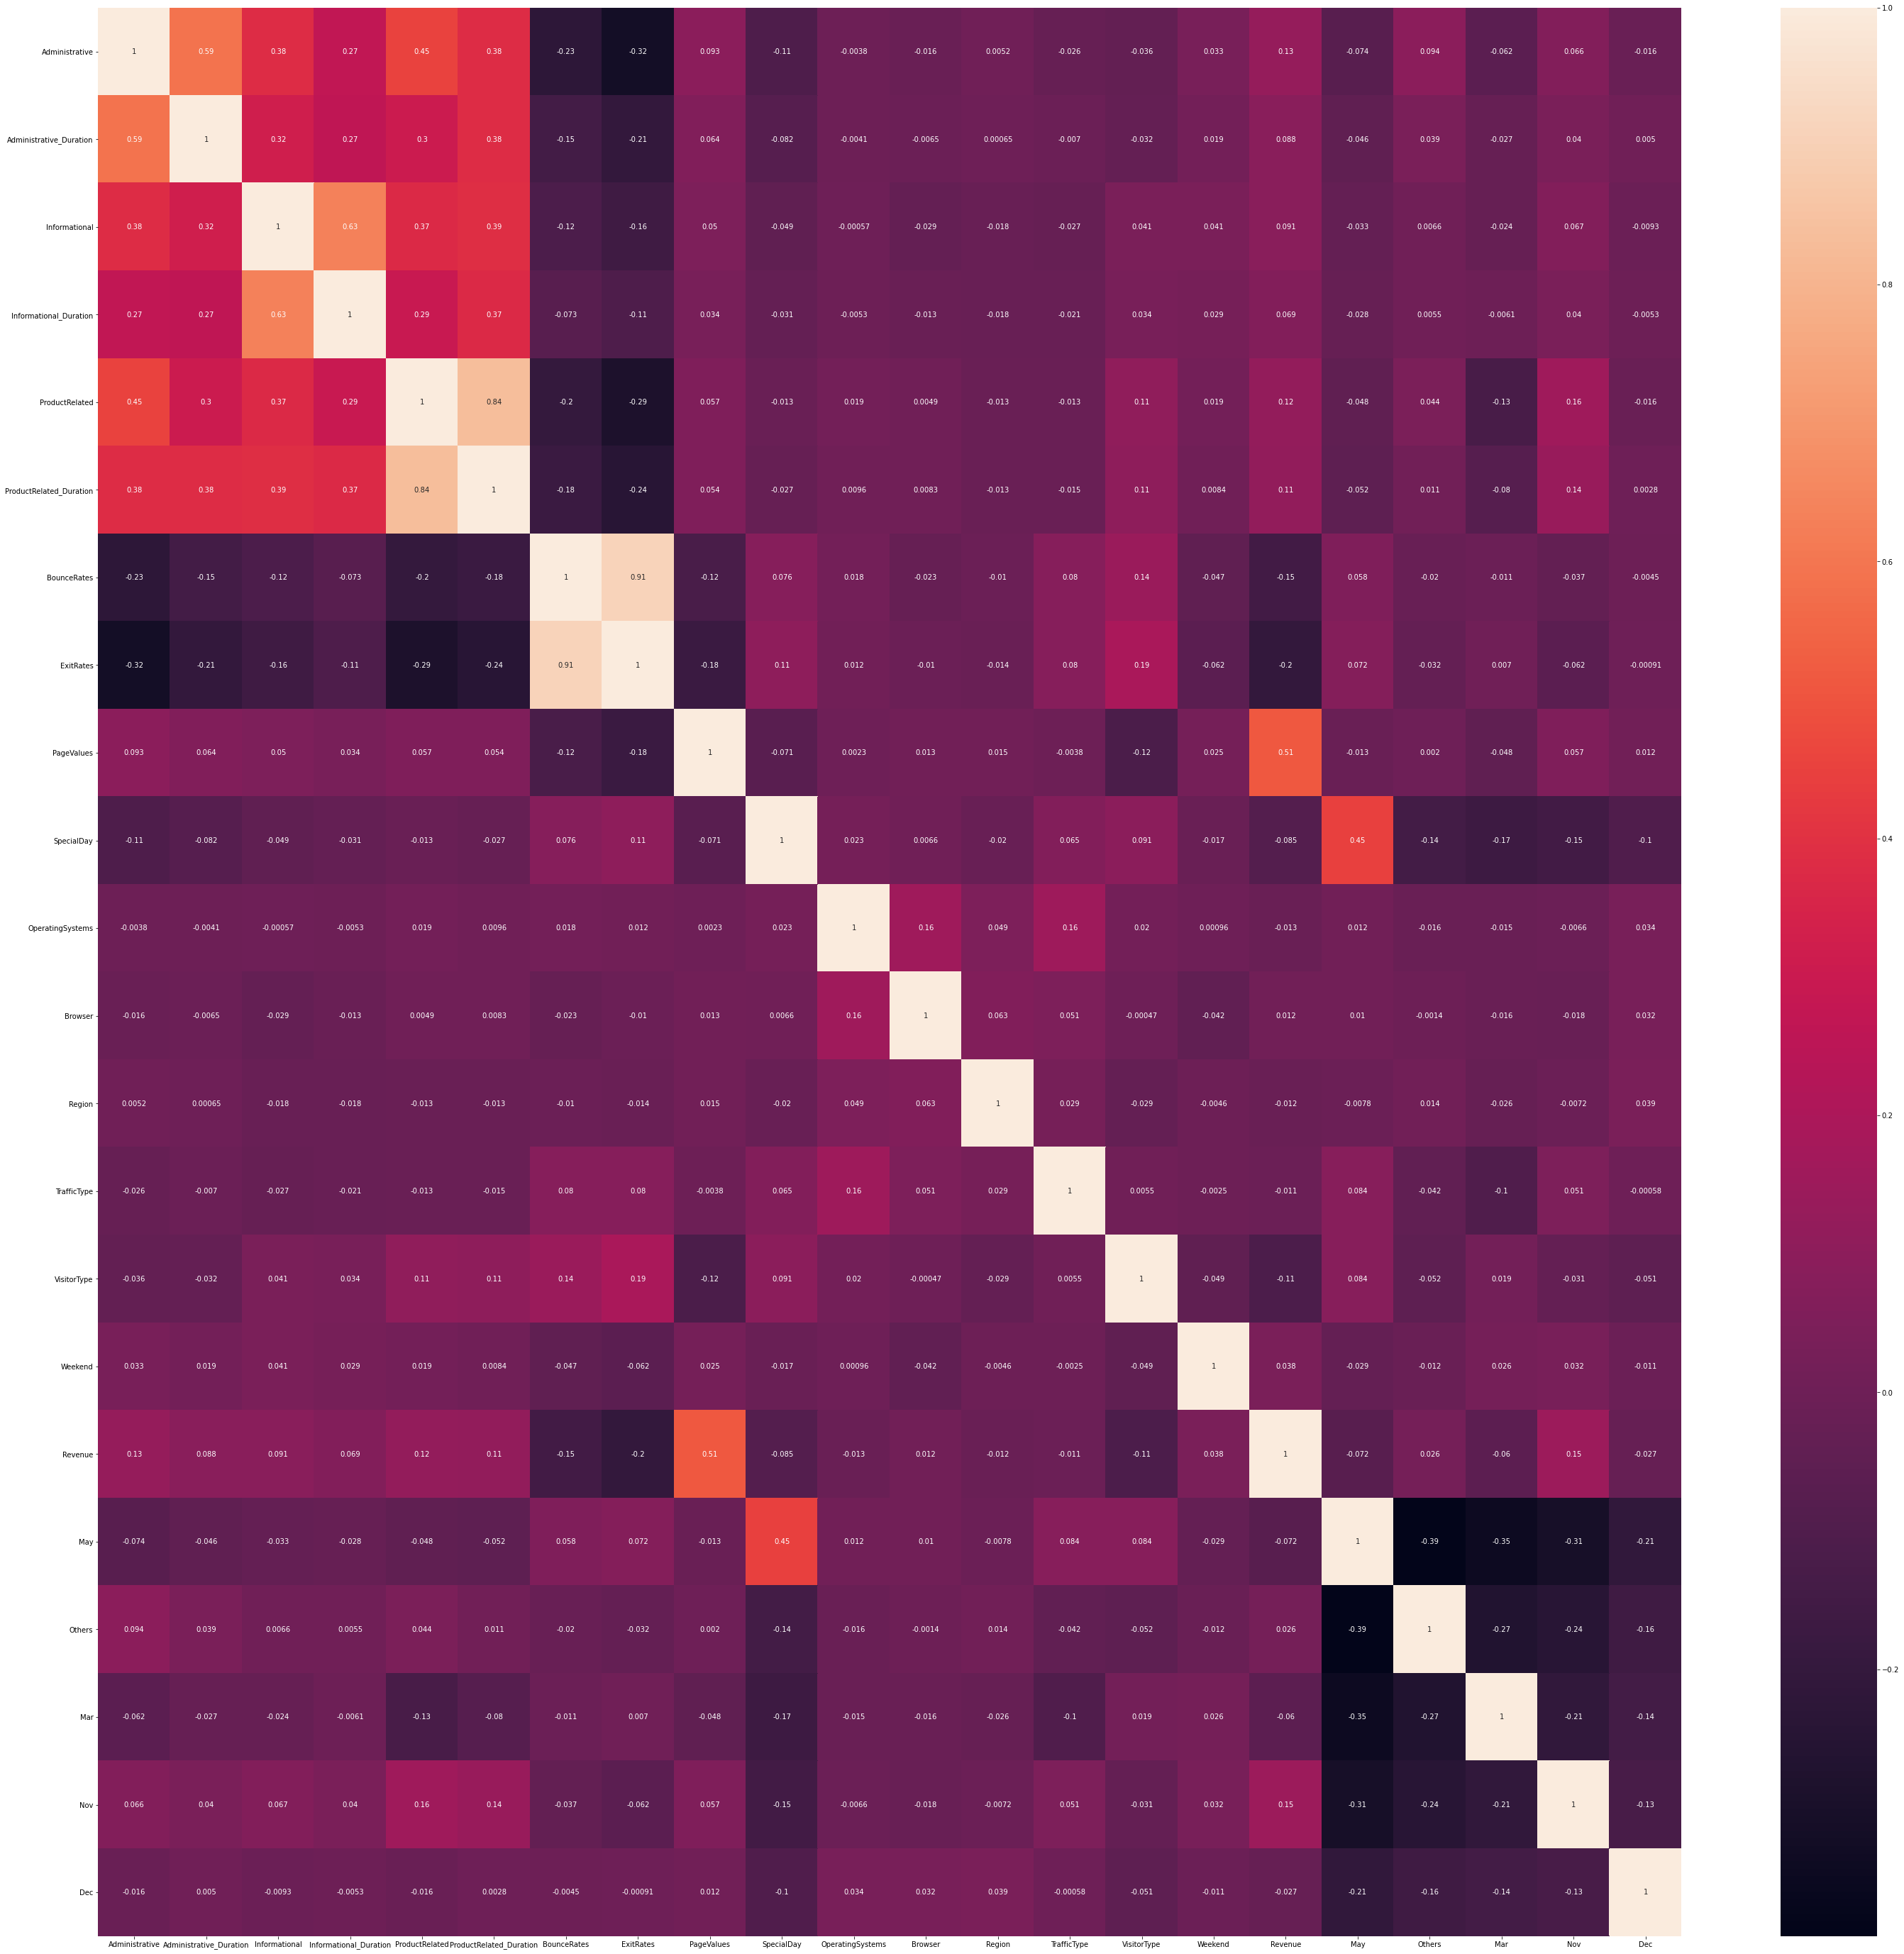

In [37]:
corrMatrix = training_data.corr()
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Some interpretations
There seems to be a stronger correlation between Revenue and Page Values, which means on average those who spent money just visited that website more before making the transaction.  There seems to be correlation between May and Special Day, which could indicate that most of the people who visited those website happened on May and this may be due to the number of special days in May. There's a 0.15 correlation with November and Revenue, which the fee earned are usually in November.  

In the supervised learning, erasing highly correlated values is strorage, speed and contributation to the data concerns. I wouldn't like to drop any column except SpecialDay and Month, because I one hot encoded it, for now. 

Although ProductRelated_Duration and ProductRelated are highly correlated, I would not like to drop them. 

In [65]:
## Dropping of the highly correlated column. 
training_data = training_data.drop(columns = 'SpecialDay')
holdout_data = holdout_data.drop(columns = 'SpecialDay')

KeyError: "['SpecialDay'] not found in axis"

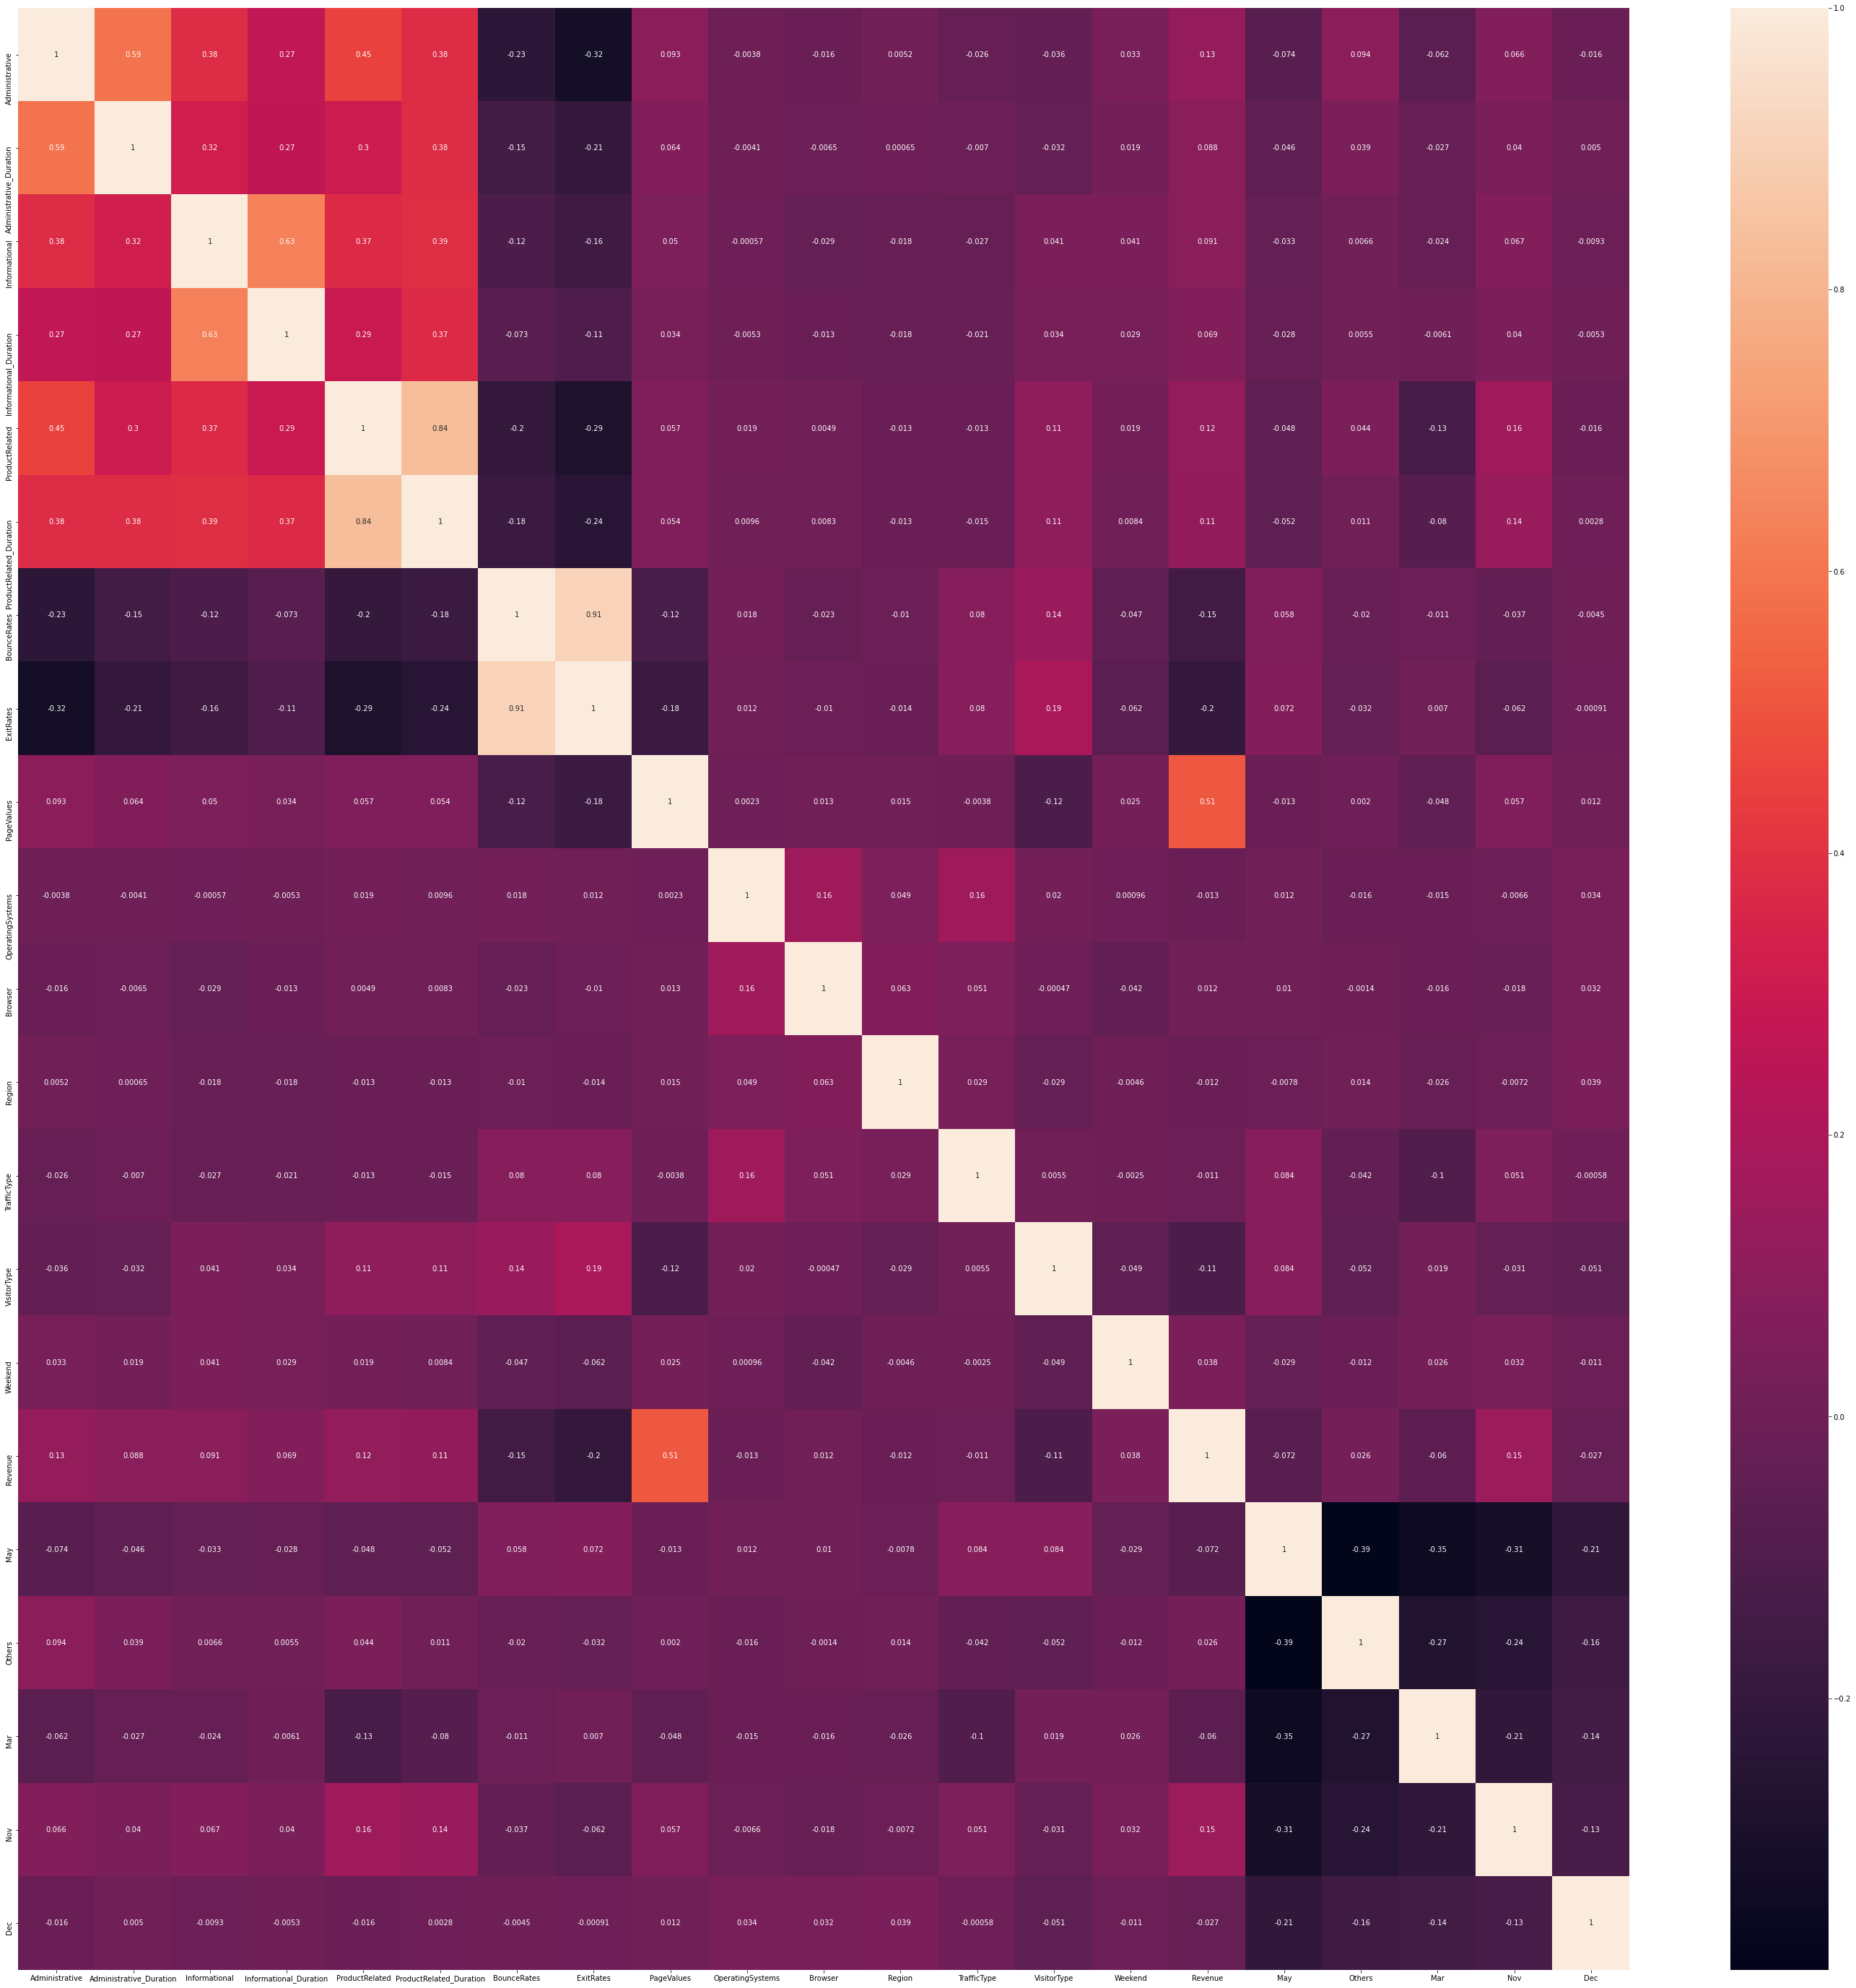

In [39]:
corrMatrix = training_data.corr()
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Feature Engineering
We can engineer a column Seasons from Month, which might help us find in which season the revenue is earned the most. The problem with months is the other columns do not help us which season it is, eventually, made it another column. 

In [40]:
def convert(month: str):
    
    res = month
    if month in ['Dec', 'Jan', 'Feb']:
        res = 1
    elif month in ['Mar', 'Apr', 'May']:
        res = 0
    elif month in ['June','Jul', 'Aug']:
        res = 0.25
    elif month in ['Sep', 'Oct', 'Nov']:
        res = 0.75

    return res

In [41]:
training_data['Season'] = month_column_training.apply(lambda x: convert(x))
holdout_data['Season'] = month_column_holdout.apply(lambda x: convert(x))

## Part 4

In [66]:
# Seperating X and y labels. 
y = training_data['Revenue']


other_columns = [col for col in training_data.columns if col != 'Revenue']        
X = training_data[other_columns]

In [43]:
# Imbalanced labelled data in training_data
print(training_data['Revenue'].value_counts())

0    8558
1    1441
Name: Revenue, dtype: int64


In [44]:
# Imbalanced labelled data in holdout_data
print(holdout_data['Revenue'].value_counts())

0    1863
1     467
Name: Revenue, dtype: int64


### Discussion about imbalance labels
There are two ways to handle imbalance labels, downsampling and oversampling. Downsampling lowers the dataset to a more suitable size by taking a random sample without replacement from the negative cases. Oversampling is a tool that involves repeatedly taking samples from a dataset, which I will be using for the training_data

In [45]:
# Seperating the binary values to different classes. 
revenue = training_data[training_data['Revenue'] == 1]
not_revenue = training_data[training_data['Revenue'] == 0]

In [46]:
# Oversampling 
oversample = resample(revenue, 
                       replace=True, 
                       n_samples=len(not_revenue), #set the number of samples to equal the number of the majority class
                      )

# Returning to new training set 
oversample_train = pd.concat([not_revenue, oversample])
oversample_train['Revenue'].value_counts(normalize=True)

0    0.5
1    0.5
Name: Revenue, dtype: float64

In [47]:
# New Oversampling x and y train data  
oversample_x_train = oversample_train.drop('Revenue', axis=1)
oversample_y_train = oversample_train['Revenue']

In [48]:
# Training data
y_train = training_data['Revenue']
X_train = training_data.drop(columns = 'Revenue')

# Holdout data
y_test = holdout_data['Revenue']
X_test = holdout_data.drop(columns = 'Revenue')

### Instantiate a RandomForest model

In [49]:
# Instantiating and fitting
oversample_rf = RandomForestClassifier(n_estimators=500).fit(oversample_x_train, oversample_y_train)

y_pred = oversample_rf.predict(X_test)
print('Accuracy score: ',  accuracy_score(y_test, y_pred))

Accuracy score:  0.863519313304721


In [67]:
# Defining at least three different hyperparameters with at least two different values each. 
param_grid = {
    'n_estimators': [50, 200, 500],
    'max_depth': [5, 10, 15, 20, 25],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 3, 4, 5],
}

### Discussion of parameter choices
n_estimators is default 100, therefore choosing values less/more than the default value is important. 
criterion default is gini yet we still would like to test entropy even though the difference might be negligible. 
max_depth is used until all leaves are pure, so we want to specify it for time. 
min_split is 2, but we would like to try more to see if any better result could be achieved. 

In [70]:
# Running GridSearch with 5 cross-validation
CV_rfc = GridSearchCV(estimator=oversample_rf, param_grid=param_grid, cv=5, n_jobs=-1)
CV_rfc.fit(oversample_x_train, oversample_y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=500),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 500]})

### Discussion of parameters
The parameter grid is given the parameter grid above to search, and cross validation is given as 5 because 5 cross-validation was required. N-jobs help it use all the processors.  

In [52]:
# list best parameters for the model
best_params = CV_rfc.best_params_
print(best_params)

{'criterion': 'gini', 'max_depth': 25, 'min_samples_split': 2, 'n_estimators': 100}


### Reporting the best performing hyperparameters
I was somehow expeciting min_samples_split, n_estimators, criterion and max_depth to be 2, 100, 'gini', and 25 respectively, since some of them were default values and max_depth default is None (will go deeper till it finds purity). Default values are usually gives the best accuracy. 

In [53]:
best_params_fit = RandomForestClassifier(**best_params).fit(oversample_x_train, oversample_y_train)

In [69]:
preds_y = best_params_fit.predict(X_test)
print(accuracy_score(y_test, preds_y))

0.8618025751072962


## Part 5

In [55]:
print(classification_report(y_test, preds_y))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1863
           1       0.70      0.54      0.61       467

    accuracy                           0.86      2330
   macro avg       0.80      0.74      0.76      2330
weighted avg       0.85      0.86      0.85      2330



In [56]:
print(precision_score(y_test, preds_y))

0.7030812324929971


In [74]:
print(recall_score(y_test, preds_y))

0.5374732334047109


In [78]:
print(f1_score(y_test, preds_y))

0.6092233009708738


### Discussion about Precision, Recall and F1. 

Let's say program identifies the purchases/revenues made. Let's say there are 35 revenues and 25 no revenue, the program identifies 34 revenues, however, 25 (true positives) of them were correctly identified, and the other 9 (false positives) is not. 10 revenues were missed (false negatives) and 16 of the non_revenues were correctly excluses (true negative). 
Then Precision is 25 / 34 ( selected elements). 
Recall is 25 / 35 ( relavent elements)


So in our case, precision is 70%. A precision score towards one means, our model is able to classify well and correctly of true positives and false positives ( labels of revenue and non_revenue). 

Our recall is 53%, and the  recall score less than 0.5 means the classifier contains a lot of false negatives, which might be due to an imbalanced class or untuned model hyperparameters. 

### Discussion about generalization 
The difference is very negligible between training and holdout accuracies. This might be because default values might be performing better since it's designed to choose the best, and the values I used were only my predictions. 

In [58]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=preds_y)

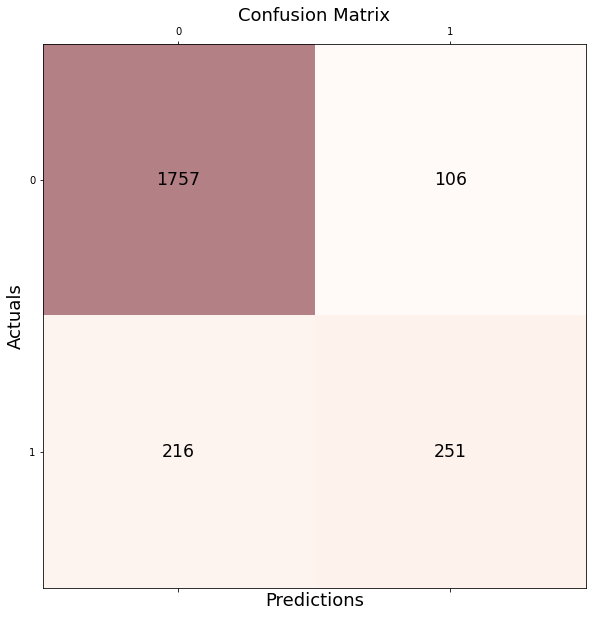

In [80]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(conf_matrix, cmap=plt.cm.Reds, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### Interpretation of Confusion Matrix 

1757 is True Negative (That is non_revenue and was predicted to be non_revenue), 251 is True Positive ( That is revenue and was predicted to be revenue), 106 is False Negative ( That is non_revenue and was predicted to be revenue), 216 is False Positive ( That is revenue and was predicted to be non_revenue) 


In [60]:
importance = oversample_rf.feature_importances_

dict_importance = {}
for i,v in enumerate(importance):
    dict_importance[i] = v 

    
dict_importance_list = (sorted(dict_importance.items(), key=lambda x: x[1], reverse=True))
for i,v in dict_importance_list:
     print('Feature: ', i, 'importance score', v)



Feature:  8 importance score 0.42598037167216257
Feature:  7 importance score 0.08765787087166815
Feature:  5 importance score 0.07731862806362774
Feature:  4 importance score 0.05800608055361469
Feature:  6 importance score 0.052728114643540804
Feature:  1 importance score 0.050790429571046486
Feature:  0 importance score 0.04076523143478034
Feature:  20 importance score 0.02778192063186583
Feature:  12 importance score 0.025103180520432773
Feature:  11 importance score 0.023813369159553427
Feature:  3 importance score 0.02060633439408584
Feature:  18 importance score 0.01965916775017629
Feature:  10 importance score 0.015656842859318638
Feature:  9 importance score 0.014350076816207672
Feature:  2 importance score 0.013733106056607908
Feature:  13 importance score 0.011543315046534995
Feature:  16 importance score 0.009860386067485847
Feature:  15 importance score 0.008524244093985412
Feature:  14 importance score 0.007228633507418868
Feature:  17 importance score 0.00547682153699308

### Discussion about the feature importance
It seems like the Future 8, ExitRate, seems to be the most important feature while Feature 19, May, seems to be the least. 

## Part 6

### DecisionTree classifier

In [82]:
classifier_model = tree.DecisionTreeClassifier()

In [83]:
classifier_model = classifier_model.fit(oversample_x_train, oversample_y_train)

In [86]:
preds_class = classifier_model.predict(X_test)


In [89]:
print(accuracy_score(y_test, preds_class))

0.7871244635193133


### Gradient Boosting Classifier

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,   max_depth=1, random_state=42).fit(oversample_x_train, oversample_y_train)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
param_grid_gradient = {
    'n_estimators':[100,200,500],
    'max_depth': [5,10,25,80],
    'loss':['deviance','exponential'],
    'random_state':[0,42,60]
}

In [ ]:
# Running GridSearch with 5 cross-validation for gradient boosting classifier
CV_GBS = GridSearchCV(estimator=clf, param_grid=param_grid_gradient, cv=5, n_jobs=-1)
CV_GBS.fit(oversample_x_train, oversample_y_train)

In [ ]:
# list best parameters for the model
best_params_GBS = CV_GBS.best_params_
print(best_params_GBS)

In [ ]:
best_params_fit_gradient = GradientBoostingClassifier(**best_params_GBS).fit(oversample_x_train, oversample_y_train)

In [73]:
preds_y_gradient = best_params_fit.predict(X_test)
print(accuracy_score(y_test, preds_y_gradient))

0.8618025751072962


### Discussion of DecisionTree and Gradient Boosting
DecisionTreeClassifier gave us the accuracy of 0.78 and gradient boosting, on the other hand, gave us the best accuracy 0.861 so far. So choosing the best parameters and doing cross-validation actually helped to increase the accuracy of the model. 

### Logistic Regression 


In [96]:
logreg = LogisticRegression( max_iter = 5000).fit(oversample_x_train, oversample_y_train)

In [97]:
y_pred = logreg.predict(X_test)
print('Accuracy on test: ', logreg.score(X_test, y_test))

Accuracy on test:  0.6824034334763949


In [98]:
param_grid_logistic = {
    'penalty':['l2', 'none'],
    'random_state':[12, 42, 80],
    'max_iter':[2000,5000,12000]
}

In [99]:
# Running GridSearch with 5 cross-validation for gradient boosting classifier
CV_logistic = GridSearchCV(estimator=logreg, param_grid=param_grid_logistic, cv=5, n_jobs=-1)

In [100]:
CV_logistic.fit(oversample_x_train, oversample_y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000), n_jobs=-1,
             param_grid={'max_iter': [2000, 5000, 12000],
                         'penalty': ['l2', 'none'],
                         'random_state': [12, 42, 80]})

In [101]:
# list best parameters for the model
best_params_logistic = CV_logistic.best_params_
print(best_params_logistic)

{'max_iter': 2000, 'penalty': 'none', 'random_state': 12}


In [102]:
best_params_fit_gradient = LogisticRegression(**best_params_logistic).fit(oversample_x_train, oversample_y_train)

In [103]:
preds_y_logistic = best_params_fit_gradient.predict(X_test)
print(accuracy_score(y_test, preds_y_logistic))

0.7253218884120172


### Discussion of Logistic Regression
The Linear regression result is generally worse than the others, around 68%. Through choosing the best parameters, the accuracy increased by 4% and reaches 72.5%. 

### Discussion of Article


The purpose of the paper was to examine the behavior of a real-time internet shopper. The objective of this article is to serve two purposes. They were tasked with determining the recipient's purpose and likelihood of abandoning the page. C4.5, Random Forest, Support Vector Machines, Multilayer Perceptron, Neural Network, Long Short-Term Memory (LSTM), and Reccurent Neural Network  (RNN) are the methods utilized in this article. This article investigated if the same accuracy could be attained with fewer features using the feature selection approach. Feature extraction was not utilized since the 17 features used were linear, which made tracking more difficult.  When it comes to the findings, the best accuracy was achieved by using Random Forest, which was 89.51 percent. In comparison to my result, this is about 4% higher. Almost all of the C4.5, 10, 20, 40 neurons in the hidden layer completed with a comparable level of accuracy, ranging from 87 to 89 percent. Random Forest's F1 score is nearly identical to mine, at around 60%. When I look at the linear regression results, I see a significant difference, about 16 percent, which leads me to believe that the accuracy is lower due to the lack of my model's complexity, and that I may need to add additional features.